# Preliminary Data Analysis

In [2]:
import pandas as pd


A1 = pd.read_csv("./data_mood_A1.txt", sep=",")
A2 = pd.read_csv("./data_mood_A2.txt",sep=",")
A3 = pd.read_csv("./data_mood_A3.txt",sep=",")

print(len(A1))

print(len(A2))

print(len(A3))

max_len = 7091 # to be updated during the course of the project


7091
7096
7197


In [2]:
A1.head()

,filename,timestamp,annotator,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,A1,0,1,0,0,0,0,1,0,0,0,0
1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,A1,0,1,0,0,0,0,0,0,0,1,0
2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,A1,0,0,0,0,0,0,0,0,0,1,0
3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,A1,0,0,0,0,0,0,1,0,0,0,1
4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,A1,0,1,1,0,1,0,0,0,0,0,0


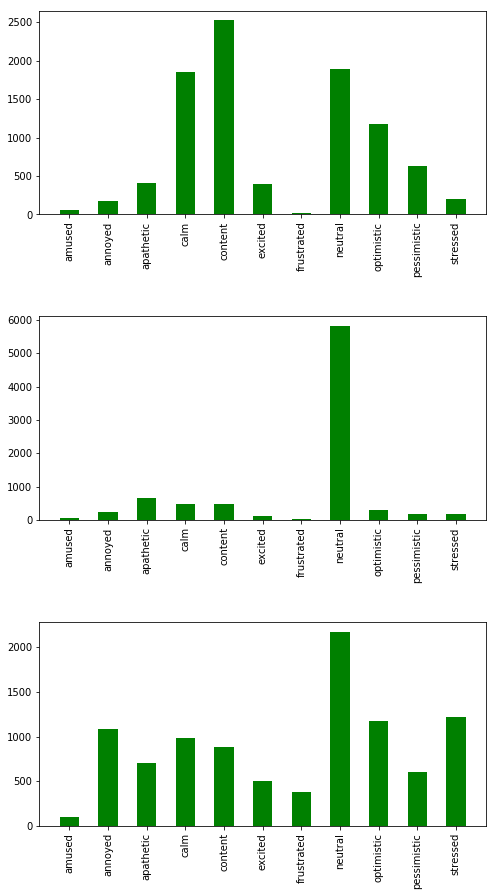

In [3]:
import matplotlib.pyplot as plt

CurrentA1= A1.iloc[0:max_len]
CurrentA2= A2.iloc[0:max_len]
CurrentA3= A3.iloc[0:max_len]

#to series
S1 = CurrentA1.sum().iloc[3:14]
S2 = CurrentA2.sum().iloc[3:14]
S3 = CurrentA3.sum().iloc[3:14]

D1 = S1.to_dict()
D2 = S2.to_dict()
D3 = S3.to_dict()



plt.figure(figsize=(8,15))
plt.subplots_adjust(hspace=0.5)


plt.subplot(3, 1, 1)


plt.bar(D1.keys(), D1.values(), 0.5, color='g')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)

plt.bar(D2.keys(), D2.values(), 0.5, color='g')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)

plt.bar(D3.keys(), D3.values(), 0.5, color='g')
plt.xticks(rotation=90)


plt.show()

In [4]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter

def kl(p, q):
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def smoothed_hist_kl_distance(ahist, bhist, sigma=1):
    
    asmooth, bsmooth = (gaussian_filter(ahist, sigma),
                        gaussian_filter(bhist, sigma))

    return abs(kl(asmooth, bsmooth))

list_d1 =  np.array(list(D1.values()))
list_d2 =  np.array(list(D2.values()))
list_d3 =  np.array(list(D3.values()))



D1_summing_to_1 =list_d1/float(sum(D1.values()))
D2_summing_to_1= list_d2/float(sum(D2.values()))
D3_summing_to_1= list_d2/float(sum(D3.values()))


print(smoothed_hist_kl_distance(D1_summing_to_1,D2_summing_to_1))
print(smoothed_hist_kl_distance(D1_summing_to_1,D3_summing_to_1))
print(smoothed_hist_kl_distance(D2_summing_to_1,D3_summing_to_1))


0.533605643115
0.671111968355
0.137506325239


In [6]:
# Check hamming loss
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

T1 = CurrentA1.iloc[:,3:14]
T2 = CurrentA2.iloc[:,3:14]
T3 = CurrentA3.iloc[:,3:14]

In [73]:
T1.get_values().tolist()

[[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 1,

In [7]:
# Hamming Loss: the fraction of the wrong labels to the total number of labels
# Therefore in this settings, the fraction of differences with respect to the total number of labels
print("RELATIVE HAMMING LOSS")
print(hamming_loss(T1,T2)) # 16%
print(hamming_loss(T1,T3)) # 21%
print(hamming_loss(T2,T3)) # 16%


print("RELATIVE ACCURACY SCORE")
#how many times to the EXACTLY agree.

print(accuracy_score(T1,T2)) # 16%
print(accuracy_score(T1,T3)) # 21%
print(accuracy_score(T2,T3)) # 16%


print("RELATIVE Precision/Recall/FScore")


print(classification_report(T1,T2, target_names=["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"])) # 16%
print(classification_report(T1,T3, target_names=["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"])) # 21%
print(classification_report(T3,T2,target_names=["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"])) # 16%

print("Cohen's Kappa, Inter Annotator Agreement")

for which_class in range(0,10):
    print("Cohen's Kappa for Class: " +str(which_class))
    print(cohen_kappa_score(T1.iloc[:,which_class],T2.iloc[:,which_class])) # 16%
    print(cohen_kappa_score(T1.iloc[:,which_class],T3.iloc[:,which_class])) # 21%
    print(cohen_kappa_score(T3.iloc[:,which_class],T2.iloc[:,which_class])) # 16%
    

RELATIVE HAMMING LOSS
0.1743439186677094
0.20553582646376328
0.17924129177831052
RELATIVE ACCURACY SCORE
0.199548723734
0.0943449442956
0.204766605556
RELATIVE Precision/Recall/FScore
             precision    recall  f1-score   support

     amused       0.03      0.03      0.03        58
       calm       0.40      0.11      0.17      1847
    content       0.37      0.07      0.12      2525
    excited       0.14      0.04      0.06       401
 optimistic       0.24      0.06      0.10      1180
    annoyed       0.02      0.02      0.02       182
  apathetic       0.08      0.12      0.09       413
 frustrated       0.00      0.00      0.00        19
pessimistic       0.14      0.04      0.06       630
   stressed       0.11      0.10      0.11       203
    neutral       0.27      0.84      0.41      1887

avg / total       0.28      0.23      0.18      9345

             precision    recall  f1-score   support

     amused       0.01      0.02      0.01        58
       calm      

In [8]:
# Approach 1: Creation of one Multi-label approach.
# decision: do not remove any label, use instead a regression approach to check how far away we are from the regressed 
# signal

Labels = (CurrentA1.iloc[:,3:14] + CurrentA2.iloc[:,3:14] + CurrentA3.iloc[:,3:14])/3

Class_frame = pd.concat([CurrentA1.iloc[:,0:2],Labels],axis=1)

#Class_frame.loc[Class_frame["amused"]>0]

Class_frame.to_csv("average_voting_elisa.csv")


In [9]:
Class_frame.head()

,filename,timestamp,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,0.0,0.666667,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.0,0.000000,0.000000
1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,0.0,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.666667,0.000000
2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.666667
4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,0.0,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.666667,0.000000


In [10]:
# Approach 2: Creation of 

Labels_majority = (((CurrentA1.iloc[:,3:14] + CurrentA2.iloc[:,3:14] + CurrentA3.iloc[:,3:14])/3)>0.3).astype("int32")

Class_frame_majority = pd.concat([CurrentA1.iloc[:,0:2],Labels_majority],axis=1)

#Class_frame.loc[Class_frame["amused"]>0]

Class_frame_majority.to_csv("union_voting_elisa.csv")

22163


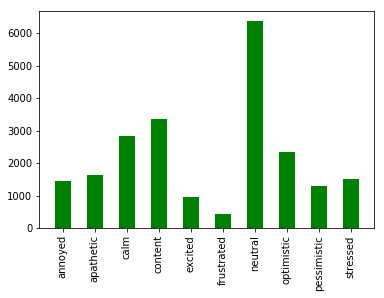

,filename,timestamp,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,0,1,0,1,1,1,1,0,0,0,0
1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,0,1,0,0,0,1,0,1,0,1,0
2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,0,0,0,0,0,0,0,0,0,1,0
3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,0,0,0,0,0,0,1,0,0,1,1
4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,0,1,1,0,1,0,0,0,0,1,0
5,20151021q3iberdrola_f000154.mp3,2018-07-25 03:02:37,0,0,1,1,1,0,0,0,0,1,1
6,20151021q3iberdrola_f000155.mp3,2018-07-25 03:02:48,0,1,1,1,0,0,1,0,0,1,0
7,20151021q3iberdrola_f000156.mp3,2018-07-25 03:03:04,0,0,0,1,1,0,0,0,1,1,0
8,20151021q3iberdrola_f000157.mp3,2018-07-25 03:03:38,0,1,1,1,0,0,0,0,0,1,1
9,20151021q3iberdrola_f000158.mp3,2018-07-25 03:03:50,1,0,1,1,0,0,0,0,0,1,1


In [11]:
Class_frame_majority.head(150)


Sm = Class_frame_majority.sum().iloc[3:14]

total_sum = Sm.sum()
print(total_sum)


Dm = Sm.to_dict()



plt.bar(Dm.keys(), Dm.values(), 0.5, color='g')
plt.xticks(rotation=90)


plt.show()

Class_frame_majority.head(25)

In [106]:
# Analysis of Length of sequences.
!pip install librosa

  Running setup.py bdist_wheel for librosa: started
  Running setup.py bdist_wheel for librosa: finished with status 'done'
  Stored in directory: C:\Users\Stefano\AppData\Local\pip\Cache\wheels\18\b8\10\f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread: started
  Running setup.py bdist_wheel for audioread: finished with status 'done'
  Stored in directory: C:\Users\Stefano\AppData\Local\pip\Cache\wheels\53\02\90\7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy: started
  Running setup.py bdist_wheel for resampy: finished with status 'done'
  Stored in directory: C:\Users\Stefano\AppData\Local\pip\Cache\wheels\ff\4f\ed\2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
  Found existing installation: scikit-learn 0.19.0


Cannot uninstall 'scikit-learn'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
from pydub import AudioSegment
import numpy as np

filenames = CurrentA1["filename"]

mylengths = np.zeros(len(filenames))

for i in range(3500,len(filenames)):
    print(i)
    name= filenames.iloc[i]
    #it is going to be the raw lenght
    speech_fragment = AudioSegment.from_mp3("./Upload_10K/"+str(name))
    print(len(speech_fragment))
    mylengths[i]=len(speech_fragment)
    


3500
10584
3501
3960
3502
14760
3503
5904
3504
6840
3505
6768
3506
6552
3507
14544
3508
4680
3509
9144
3510
10440
3511
12888
3512
5832
3513
8208
3514
6840
3515
5472
3516
11520
3517
5112
3518
8136
3519
12456
3520
23112
3521
11160
3522
3600
3523
10224
3524
8424
3525
12024
3526
5760
3527
8784
3528
3312
3529
3528
3530
7128
3531
7272
3532
17208
3533
5616
3534
5184
3535
7848
3536
6984
3537
11232
3538
15552
3539
5688
3540
41688
3541
12672
3542
14112
3543
4320
3544
5040
3545
8064
3546
4392
3547
11520
3548
19728
3549
5832
3550
14544
3551
7560
3552
6480
3553
4104
3554
4104
3555
7200
3556
4032
3557
4176
3558
10872
3559
8784
3560
5184
3561
5832
3562
5184
3563
8640
3564
4608
3565
5832
3566
3312
3567
4104
3568
13896
3569
5184
3570
6192
3571
6048
3572


KeyboardInterrupt: 

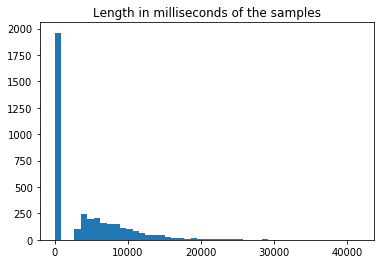

In [11]:
import matplotlib.pyplot as plt
plt.hist(mylengths, bins='auto')  # arguments are passed to np.histogram
plt.title("Length in milliseconds of the samples")
plt.show()

In [61]:
# Since it would imply to have to deal with sequences of different size, 
# I try here the simplification of using convolutional neural networks
# to classify spectrum.
#I am using librosa. the installation of librosa on Python 3.6 was not without pain.

In [13]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import librosa.core as ct

# Load sound file
for i in range(3500,len(filenames)):
    y, sr = librosa.load("./Upload_10K/"+str(filenames.iloc[i]))

    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_S = ct.amplitude_to_db(S)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr)#, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    #plt.title('mel power spectrogram')

    # draw a color bar
    #plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    #plt.tight_layout()
    plt.savefig("./Spectrograms_10K/"+str(filenames.iloc[i])+ ".png")
    #plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [69]:
len(filenames.unique())#apparently there are duplicates somehow.

1944

(128, 394)


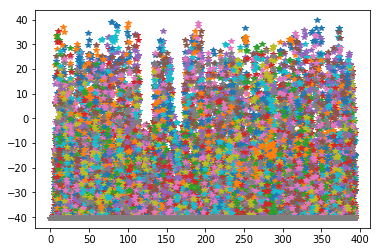

23.20812182741117
22050


In [53]:
print(np.shape(log_S))
plt.plot(log_S.T, "*")
plt.show()
print(9144/394)
print(sr)